## Preprocessing

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!apt-get install openjdk-8-jdk-headless -qq

In [ ]:
!sudo add-apt-repository ppa:webupd8team/java
!sudo apt-get update
!sudo apt-get install oracle-java8-installer

 The Oracle JDK License has changed for releases starting April 16, 2019.

The new Oracle Technology Network License Agreement for Oracle Java SE is substantially different from prior Oracle JDK licenses. The new license permits certain uses, such as personal use and development use, at no cost -- but other uses authorized under prior Oracle JDK licenses may no longer be available. Please review the terms carefully before downloading and using this product. An FAQ is available here: https://www.oracle.com/technetwork/java/javase/overview/oracle-jdk-faqs.html

Oracle Java downloads now require logging in to an Oracle account to download Java updates, like the latest Oracle Java 8u211 / Java SE 8u212. Because of this I cannot update the PPA with the latest Java (and the old links were broken by Oracle).

For this reason, THIS PPA IS DISCONTINUED.

UPDATE:

For Oracle Java 17, see a different PPA -> https://www.linuxuprising.com/2021/09/how-to-install-oracle-java-17-lts-on.html

Old descr

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CICMalMem2022_Malware_Classification/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Proje


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
      .master("local") \
      .appName("Proje") \
      .config("spark.executor.memory", "12gb") \
      .getOrCreate()

sc = spark.sparkContext

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sbn
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras

In [ ]:
dataset = pd.read_csv("Obfuscated-MalMem2022.csv")

In [ ]:
dataset.tail(5)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [ ]:
dataset.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [ ]:
dataset.Class.value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

dataset["Class"]= LabelEncoder().fit_transform(dataset["Class"])

In [ ]:
dataset.Class.value_counts()

0    29298
1    29298
Name: Class, dtype: int64

In [ ]:
dataset.value_counts("Category")

Category
Benign                                                                                         29298
Spyware-Transponder-0dcb10bb8760428a704587c3976c5c045315cca59333f6f31eb1690f21df8553-6.raw         2
Spyware-Transponder-0dcddfad933171346232bd3d5f1186d66126b0e0a0e15385856e9e15c2c02e15-5.raw         2
Spyware-Transponder-0dcddfad933171346232bd3d5f1186d66126b0e0a0e15385856e9e15c2c02e15-4.raw         2
Spyware-Transponder-0dcddfad933171346232bd3d5f1186d66126b0e0a0e15385856e9e15c2c02e15-3.raw         2
                                                                                               ...  
Spyware-180solutions-0a09c38c3c5003d5adff784e1337c3207be62fafbebde86bff2a1dbe65a9fb42-1.raw        1
Spyware-180solutions-01b2e72a6ca18b91a382a67099d61045e167f24da53470478110ade44180186e-9.raw        1
Spyware-180solutions-01b2e72a6ca18b91a382a67099d61045e167f24da53470478110ade44180186e-8.raw        1
Spyware-180solutions-01b2e72a6ca18b91a382a67099d61045e167f24da53470478110ade441801

In [ ]:
dataset = dataset.iloc[:,1:]

In [ ]:
zero= []
dataset.to_numpy()
for i in dataset:
  if dataset[i].sum(axis=0) == 0:
     zero.append(i)
print(zero)

['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']


In [ ]:
dataset= dataset.drop(columns= ['pslist.nprocs64bit',
                                'handles.nport', 'svcscan.interactive_process_services'])

In [ ]:
dataset.head(3)

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,202.844444,1694,38.50000,9129,212.302326,670,3161,...,389,221,26,24,116,121,87,0,8,0
1,47,19,11.531915,242.234043,2074,44.12766,11385,242.234043,840,3761,...,392,222,26,24,118,122,87,0,8,0
2,40,14,14.725000,288.225000,1932,48.30000,11529,288.225000,1050,3996,...,395,222,26,27,118,120,88,0,8,0


In [ ]:
dataset = spark.createDataFrame(dataset)

In [ ]:
dataset = dataset.toDF(*(c.replace('.', '_') for c in dataset.columns))

In [ ]:
dataset.printSchema()

root
 |-- pslist_nproc: long (nullable = true)
 |-- pslist_nppid: long (nullable = true)
 |-- pslist_avg_threads: double (nullable = true)
 |-- pslist_avg_handlers: double (nullable = true)
 |-- dlllist_ndlls: long (nullable = true)
 |-- dlllist_avg_dlls_per_proc: double (nullable = true)
 |-- handles_nhandles: long (nullable = true)
 |-- handles_avg_handles_per_proc: double (nullable = true)
 |-- handles_nfile: long (nullable = true)
 |-- handles_nevent: long (nullable = true)
 |-- handles_ndesktop: long (nullable = true)
 |-- handles_nkey: long (nullable = true)
 |-- handles_nthread: long (nullable = true)
 |-- handles_ndirectory: long (nullable = true)
 |-- handles_nsemaphore: long (nullable = true)
 |-- handles_ntimer: long (nullable = true)
 |-- handles_nsection: long (nullable = true)
 |-- handles_nmutant: long (nullable = true)
 |-- ldrmodules_not_in_load: long (nullable = true)
 |-- ldrmodules_not_in_init: long (nullable = true)
 |-- ldrmodules_not_in_mem: long (nullable = true

In [ ]:
dataset.drop("Class").toPandas().columns

Index(['pslist_nproc', 'pslist_nppid', 'pslist_avg_threads',
       'pslist_avg_handlers', 'dlllist_ndlls', 'dlllist_avg_dlls_per_proc',
       'handles_nhandles', 'handles_avg_handles_per_proc', 'handles_nfile',
       'handles_nevent', 'handles_ndesktop', 'handles_nkey', 'handles_nthread',
       'handles_ndirectory', 'handles_nsemaphore', 'handles_ntimer',
       'handles_nsection', 'handles_nmutant', 'ldrmodules_not_in_load',
       'ldrmodules_not_in_init', 'ldrmodules_not_in_mem',
       'ldrmodules_not_in_load_avg', 'ldrmodules_not_in_init_avg',
       'ldrmodules_not_in_mem_avg', 'malfind_ninjections',
       'malfind_commitCharge', 'malfind_protection',
       'malfind_uniqueInjections', 'psxview_not_in_pslist',
       'psxview_not_in_eprocess_pool', 'psxview_not_in_ethread_pool',
       'psxview_not_in_pspcid_list', 'psxview_not_in_csrss_handles',
       'psxview_not_in_session', 'psxview_not_in_deskthrd',
       'psxview_not_in_pslist_false_avg',
       'psxview_not_in_eproc

In [ ]:
from pyspark.ml.feature import VectorAssembler

assemblerInput = ['pslist_nproc', 'pslist_nppid', 'pslist_avg_threads',
       'pslist_avg_handlers', 'dlllist_ndlls', 'dlllist_avg_dlls_per_proc',
       'handles_nhandles', 'handles_avg_handles_per_proc', 'handles_nfile',
       'handles_nevent', 'handles_ndesktop', 'handles_nkey', 'handles_nthread',
       'handles_ndirectory', 'handles_nsemaphore', 'handles_ntimer',
       'handles_nsection', 'handles_nmutant', 'ldrmodules_not_in_load',
       'ldrmodules_not_in_init', 'ldrmodules_not_in_mem',
       'ldrmodules_not_in_load_avg', 'ldrmodules_not_in_init_avg',
       'ldrmodules_not_in_mem_avg', 'malfind_ninjections',
       'malfind_commitCharge', 'malfind_protection',
       'malfind_uniqueInjections', 'psxview_not_in_pslist',
       'psxview_not_in_eprocess_pool', 'psxview_not_in_ethread_pool',
       'psxview_not_in_pspcid_list', 'psxview_not_in_csrss_handles',
       'psxview_not_in_session', 'psxview_not_in_deskthrd',
       'psxview_not_in_pslist_false_avg',
       'psxview_not_in_eprocess_pool_false_avg',
       'psxview_not_in_ethread_pool_false_avg',
       'psxview_not_in_pspcid_list_false_avg',
       'psxview_not_in_csrss_handles_false_avg',
       'psxview_not_in_session_false_avg', 'psxview_not_in_deskthrd_false_avg',
       'modules_nmodules', 'svcscan_nservices', 'svcscan_kernel_drivers',
       'svcscan_fs_drivers', 'svcscan_process_services',
       'svcscan_shared_process_services', 'svcscan_nactive',
       'callbacks_ncallbacks', 'callbacks_nanonymous', 'callbacks_ngeneric']

assembler = VectorAssembler(inputCols= assemblerInput,  outputCol='vectorized_features')

vectorized_dataset = assembler.transform(dataset)

In [ ]:
from pyspark.ml.feature import Normalizer

normalized_dataset=Normalizer().setP(1).setInputCol("vectorized_features").setOutputCol("features")
normalized_data=normalized_dataset.transform(vectorized_dataset)

In [ ]:
dataset=normalized_data.select('features', 'Class')

In [ ]:
data = dataset.toPandas()

In [ ]:
data.head(5)

,features,Class
0,"[0.0022975428262595704, 0.0008679606232536155,...",0
1,"[0.001949461062095377, 0.0007880800038257907, ...",0
2,"[0.0016497500064885586, 0.0005774125022709955,...",0
3,"[0.0017672059900451793, 0.0007179274334558541,...",0
4,"[0.0016734215373824654, 0.0006374939190028439,...",0


In [ ]:
data.to_csv("preprocessed_dataset.csv")

## Analysis

In [ ]:
dataset = spark.read.format("csv") \
                    .options(header='true', quote='"',  delimiter=",",
                             ignoreLeadingWhiteSpace='true',inferSchema='true')\
                             .load("/content/drive/My Drive/Proje/preprocessed_dataset.csv")

In [ ]:
dataset.show(2)

+---+--------------------+-----+
|_c0|            features|Class|
+---+--------------------+-----+
|  0|[0.00229754282625...|    0|
|  1|[0.00194946106209...|    0|
+---+--------------------+-----+
only showing top 2 rows



In [ ]:
dataset = dataset.drop('_c0')

In [ ]:
import pyspark.sql.functions as F
from pyspark.ml.functions import array_to_vector

dataset = dataset.withColumn(
    'features_all', array_to_vector(F.from_json('features', "array<double>")))
dataset.printSchema()

root
 |-- features: string (nullable = true)
 |-- Class: integer (nullable = true)
 |-- features_all: vector (nullable = true)



In [ ]:
train_data,test_data = dataset.randomSplit([0.7,0.3], seed=1234)

In [ ]:
# **********************RANDOM FOREST ALGORİTMASI*******************

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='Class', featuresCol='features_all', maxDepth=5, seed=1234)
model = rf.fit(train_data)
predictions = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(
    labelCol='Class', rawPredictionCol='rawPrediction' ,metricName='areaUnderROC')

auc = evaluator.evaluate(predictions)

print("AUC = %g" % (auc))

AUC = 0.99982


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score

y_true1 = predictions.select("Class").toPandas()
y_pred1 = predictions.select("Prediction").toPandas()

target_names = ["Benign","Malware"]
print(classification_report(y_true1, y_pred1,target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      8865
     Malware       1.00      1.00      1.00      8708

    accuracy                           1.00     17573
   macro avg       1.00      1.00      1.00     17573
weighted avg       1.00      1.00      1.00     17573



In [ ]:
print ("accuracy: ",accuracy_score(y_true1, y_pred1))
print ("f1-score: ",f1_score(y_true1, y_pred1))
print ("recall: ", recall_score(y_true1, y_pred1))
print ("precision: ", precision_score(y_true1, y_pred1))

accuracy:  0.9978944972400842
f1-score:  0.9978768577494692
recall:  0.9985071198897566
precision:  0.9972473907558206


In [ ]:
cm1 = confusion_matrix(y_true1, y_pred1)
cm1

array([[8841,   24],
       [  13, 8695]])

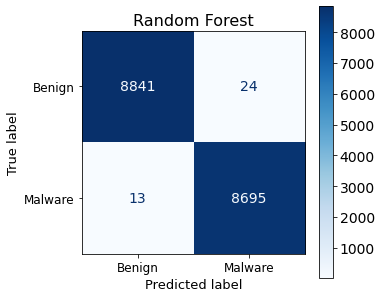

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm1,display_labels=target_names)
fig, ax1, = plt.subplots(figsize=(5,5))
ax1.set_title('Random Forest', fontdict = {'fontsize': 16})
ax1.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax1.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax1, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#**********************DECISION TREE ALGORİTMASI*******************

from pyspark.ml.classification import DecisionTreeClassifier
dtr = DecisionTreeClassifier(labelCol='Class',
                        featuresCol="features_all", maxDepth=5,seed=1234)
model2 = dtr.fit(train_data)
predictions2 = model2.transform(test_data)

In [ ]:
evaluator = BinaryClassificationEvaluator(
    labelCol='Class', rawPredictionCol='rawPrediction' ,metricName='areaUnderROC')

auc = evaluator.evaluate(predictions2)
print("AUC = %g" % (auc))

AUC = 0.997643


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true2 = predictions2.select("Class").toPandas()
y_pred2 = predictions2.select("prediction").toPandas()

target_names = ["Benign","Malware"]
print(classification_report(y_true2, y_pred2,target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      8865
     Malware       1.00      1.00      1.00      8708

    accuracy                           1.00     17573
   macro avg       1.00      1.00      1.00     17573
weighted avg       1.00      1.00      1.00     17573



In [ ]:
print ("accuracy: ",accuracy_score(y_true2, y_pred2))
print ("f1-score: ",f1_score(y_true2, y_pred2))
print ("recall: ", recall_score(y_true2, y_pred2))
print ("precision: ", precision_score(y_true2, y_pred2))

accuracy:  0.9990326068400387
f1-score:  0.9990232691755243
recall:  0.9983922829581994
precision:  0.9996550534667127


In [ ]:
cm2 = confusion_matrix(y_true2, y_pred2)
cm2

array([[8862,    3],
       [  14, 8694]])

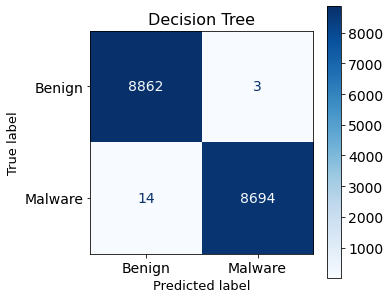

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm2,display_labels=target_names)
fig, ax2, = plt.subplots(figsize=(5,5))
ax2.set_title('Decision Tree', fontdict = {'fontsize': 16})
ax2.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax2.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax2, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#**********************NAIVE BAYES ALGORİTMASI*******************

from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(labelCol='Class',
                        featuresCol="features_all",smoothing=1.0, modelType="gaussian")
model3 = nb.fit(train_data)
predictions3 = model3.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(
    labelCol='Class',rawPredictionCol="rawPrediction",  metricName='areaUnderROC')

auc = evaluator.evaluate(predictions3)
print("AUC = %g" % (auc))

AUC = 0.84245


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true3 = predictions3.select("Class").toPandas()
y_pred3 = predictions3.select("prediction").toPandas()


target_names = ["Benign","Malware"]
print(classification_report(y_true3, y_pred3,target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      0.97      0.98      8865
     Malware       0.97      1.00      0.98      8708

    accuracy                           0.98     17573
   macro avg       0.98      0.98      0.98     17573
weighted avg       0.98      0.98      0.98     17573



In [ ]:
print ("accuracy: ",accuracy_score(y_true3, y_pred3))
print ("f1-score: ",f1_score(y_true3, y_pred3))
print ("recall: ", recall_score(y_true3, y_pred3))
print ("precision: ", precision_score(y_true3, y_pred3))

accuracy:  0.9840664656006374
f1-score:  0.9841539332201473
recall:  0.9985071198897566
precision:  0.9702075429591609


In [ ]:
cm3 = confusion_matrix(y_true3, y_pred3)
cm3

array([[8598,  267],
       [  13, 8695]])

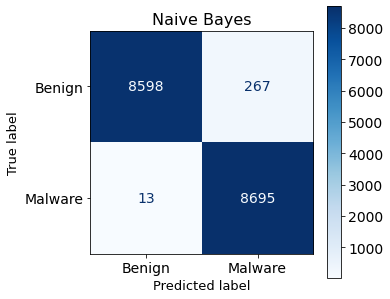

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm3,display_labels=target_names)
fig, ax3, = plt.subplots(figsize=(5,5))
ax3.set_title('Naive Bayes', fontdict = {'fontsize': 16})
ax3.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax3.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax3, cmap=plt.cm.Blues)
plt.show()

In [ ]:
roc_auc_score(y_true3, y_pred3)

0.8424499737163977

In [ ]:
#********************** LOGISTIC RESGRESSION ALGORİTMASI*******************

from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol='Class', featuresCol="features_all")
model4 = lr.fit(train_data)
predictions4 = model4.transform(test_data)

In [ ]:
evaluator = BinaryClassificationEvaluator(
    labelCol='Class', rawPredictionCol='rawPrediction' ,metricName='areaUnderROC')

auc = evaluator.evaluate(predictions4)
print("AUC = %g" % (auc))

AUC = 1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true4 = predictions4.select("Class").toPandas()
y_pred4 = predictions4.select("prediction").toPandas()


target_names = ["Benign","Malware"]
print(classification_report(y_true4, y_pred4,target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      8865
     Malware       1.00      1.00      1.00      8708

    accuracy                           1.00     17573
   macro avg       1.00      1.00      1.00     17573
weighted avg       1.00      1.00      1.00     17573



In [ ]:
print ("accuracy: ",accuracy_score(y_true4, y_pred4))
print ("f1-score: ",f1_score(y_true4, y_pred4))
print ("recall: ", recall_score(y_true4, y_pred4))
print ("precision: ", precision_score(y_true4, y_pred4))

accuracy:  0.9997154726000114
f1-score:  0.9997128911857593
recall:  0.9996554892053284
precision:  0.9997702997588147


In [ ]:
cm4 = confusion_matrix(y_true4, y_pred4)
cm4

array([[8863,    2],
       [   3, 8705]])

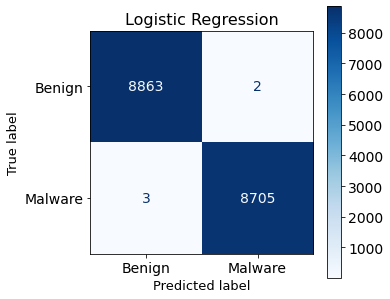

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm4,display_labels=target_names)
fig, ax4, = plt.subplots(figsize=(5,5))
ax4.set_title('Logistic Regression', fontdict = {'fontsize': 16})
ax4.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax4.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax4, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#********************** GRADIENT BOOSTED TREE ALGORİTMASI*******************

from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol='Class', featuresCol="features_all", maxIter=10, seed=1234)
model5 = gbt.fit(train_data)
predictions5 = model5.transform(test_data)

In [ ]:
evaluator = BinaryClassificationEvaluator(
    labelCol='Class', rawPredictionCol='rawPrediction' ,metricName='areaUnderROC')

auc = evaluator.evaluate(predictions5)
print("AUC = %g" % (auc))

AUC = 0.999827


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true5 = predictions5.select("Class").toPandas()
y_pred5 = predictions5.select("prediction").toPandas()


target_names = ["Benign","Malware"]
print(classification_report(y_true5, y_pred5,target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      8865
     Malware       1.00      1.00      1.00      8708

    accuracy                           1.00     17573
   macro avg       1.00      1.00      1.00     17573
weighted avg       1.00      1.00      1.00     17573



In [ ]:
print ("accuracy: ",accuracy_score(y_true5, y_pred5))
print ("f1-score: ",f1_score(y_true5, y_pred5))
print ("recall: ", recall_score(y_true5, y_pred5))
print ("precision: ", precision_score(y_true5, y_pred5))

accuracy:  0.999374039720025
f1-score:  0.9993682154959509
recall:  0.9990813045475425
precision:  0.9996552912788693


In [ ]:
cm5 = confusion_matrix(y_true5, y_pred5)
cm5

array([[8862,    3],
       [   8, 8700]])

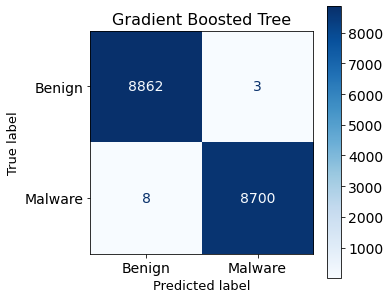

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm5,display_labels=target_names)
fig, ax5, = plt.subplots(figsize=(5,5))
ax5.set_title('Gradient Boosted Tree', fontdict = {'fontsize': 16})
ax5.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax5.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax5, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#********************** LINEAR SVC ALGORİTMASI*******************

from pyspark.ml.classification import LinearSVC

svm = LinearSVC(labelCol='Class', featuresCol="features_all", maxIter=10)
model6 = svm.fit(train_data)
predictions6 = model6.transform(test_data)

In [ ]:
evaluator = BinaryClassificationEvaluator(
    labelCol='Class', rawPredictionCol='rawPrediction' ,metricName='areaUnderROC')

auc = evaluator.evaluate(predictions6)
print("AUC = %g" % (auc))

AUC = 0.997619


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true6 = predictions6.select("Class").toPandas()
y_pred6 = predictions6.select("prediction").toPandas()


target_names = ["Benign","Malware"]
print(classification_report(y_true6, y_pred6,target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99      8865
     Malware       0.99      1.00      0.99      8708

    accuracy                           0.99     17573
   macro avg       0.99      0.99      0.99     17573
weighted avg       0.99      0.99      0.99     17573



In [ ]:
print ("accuracy: ",accuracy_score(y_true6, y_pred6))
print ("f1-score: ",f1_score(y_true6, y_pred6))
print ("recall: ", recall_score(y_true6, y_pred6))
print ("precision: ", precision_score(y_true6, y_pred6))

accuracy:  0.9914072725203437
f1-score:  0.9913689625607316
recall:  0.9958658704639411
precision:  0.9869124843518835


In [ ]:
cm6 = confusion_matrix(y_true6, y_pred6)
cm6

array([[8750,  115],
       [  36, 8672]])

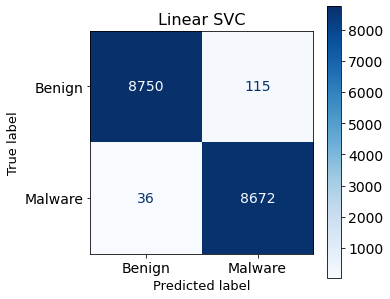

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm6,display_labels=target_names)
fig, ax6, = plt.subplots(figsize=(5,5))
ax6.set_title('Linear SVC', fontdict = {'fontsize': 16})
ax6.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax6.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax6, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#********************** MULTILAYER PERCEPTRON ALGORİTMASI*******************

layers = [52,20,16,2]

from pyspark.ml.classification import MultilayerPerceptronClassifier

mpc = MultilayerPerceptronClassifier(labelCol='Class',
                        featuresCol="features_all",
                        maxIter=50, layers=layers, blockSize=128, seed=1234)
model7 = mpc.fit(train_data)
predictions7 = model7.transform(test_data)

In [ ]:
evaluator = BinaryClassificationEvaluator(
    labelCol='Class', rawPredictionCol='rawPrediction' ,metricName='areaUnderROC')

auc = evaluator.evaluate(predictions7)
print("AUC = %g" % (auc))

AUC = 0.992338


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true7 = predictions7.select("Class").toPandas()
y_pred7 = predictions7.select("prediction").toPandas()


target_names = ["Benign","Malware"]
print(classification_report(y_true7, y_pred7,target_names = target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.96      0.98      8865
     Malware       0.96      0.99      0.98      8708

    accuracy                           0.98     17573
   macro avg       0.98      0.98      0.98     17573
weighted avg       0.98      0.98      0.98     17573



In [ ]:
print ("accuracy: ",accuracy_score(y_true7, y_pred7))
print ("f1-score: ",f1_score(y_true7, y_pred7))
print ("recall: ", recall_score(y_true7, y_pred7))
print ("precision: ", precision_score(y_true7, y_pred7))

accuracy:  0.976725658680931
f1-score:  0.9768232560775203
recall:  0.9897795130914102
precision:  0.9642018122832532


In [ ]:
cm7 = confusion_matrix(y_true7, y_pred7)
cm7

array([[8545,  320],
       [  89, 8619]])

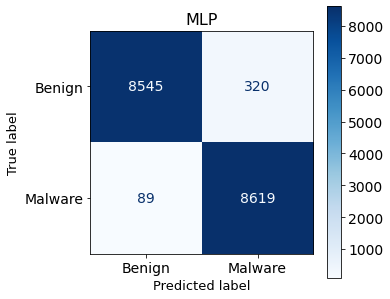

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm7,display_labels=target_names)
fig, ax7, = plt.subplots(figsize=(5,5))
ax7.set_title('MLP', fontdict = {'fontsize': 16})
ax7.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax7.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax7, cmap=plt.cm.Blues)
plt.show()

In [ ]:
xtrain_array = np.asarray(train_data.select('features_all').collect())
xtest_array = np.asarray(test_data.select('features_all').collect())
ytrain_array = np.asarray(train_data.select('Class').collect())
ytest_array = np.asarray(test_data.select('Class').collect())

In [ ]:
print(ytrain_array.shape)
print(ytest_array.shape)
print(xtrain_array.shape)
print(xtest_array.shape)

(41023, 1)
(17573, 1)
(41023, 1, 52)
(17573, 1, 52)


In [ ]:
xtrain_array =xtrain_array.reshape(-1,52)
xtest_array = xtest_array.reshape(-1,52)

In [ ]:
print(ytrain_array.shape)
print(ytest_array.shape)
print(xtrain_array.shape)
print(xtest_array.shape)

(41023, 1)
(17573, 1)
(41023, 52)
(17573, 52)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow


os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)

In [ ]:
from pandas.core.common import random_state
model11 = Sequential()

model11.add(Dense(55,activation = "relu"))
model11.add(Dropout(0.4))

model11.add(Dense(30,activation = "relu"))
model11.add(Dropout(0.4))

model11.add(Dense(30,activation = "relu"))
model11.add(Dropout(0.4))

model11.add(Dense(1,activation = "sigmoid"))

model11.compile(loss="binary_crossentropy",optimizer = "adam")

model11.fit(xtrain_array, ytrain_array, epochs=10,
          validation_data=(xtest_array, ytest_array),verbose=1)

Epoch 1/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.2871 - val_loss: 0.0510
Epoch 2/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0676 - val_loss: 0.0423
Epoch 3/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0617 - val_loss: 0.0342
Epoch 4/10
1282/1282 [==============================] - 3s 3ms/step - loss: 0.0537 - val_loss: 0.0315
Epoch 5/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0568 - val_loss: 0.0312
Epoch 6/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0514 - val_loss: 0.0266
Epoch 7/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0521 - val_loss: 0.0260
Epoch 8/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0480 - val_loss: 0.0389
Epoch 9/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.0461 - val_loss: 0.0300
Epoch 10/10
1282/1282 [==============================] - 4s 3ms/step - loss: 0.047

In [ ]:
model11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 55)                2915      
                                                                 
 dropout_10 (Dropout)        (None, 55)                0         
                                                                 
 dense_11 (Dense)            (None, 30)                1680      
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_12 (Dense)            (None, 30)                930       
                                                                 
 dropout_12 (Dropout)        (None, 30)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

Text(0.5, 1.0, 'Deep Neural Network (DNN)')

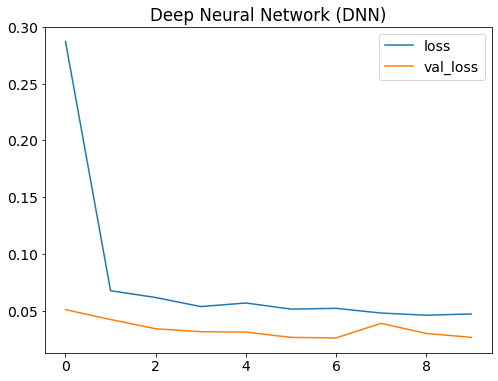

In [ ]:
kayipDf11 = pd.DataFrame(model11.history.history)
ax = kayipDf11.plot()
ax.set_title("Deep Neural Network (DNN)")

In [ ]:
y_pred11 = model11.predict(xtest_array)

In [ ]:
y_pred11 = np.where(y_pred11 > 0.5, 1, 0)
y_pred11

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ["Benign","Malware"]
print(classification_report(ytest_array,y_pred11,target_names = target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      8865
     Malware       0.99      0.99      0.99      8708

    accuracy                           0.99     17573
   macro avg       0.99      0.99      0.99     17573
weighted avg       0.99      0.99      0.99     17573



In [ ]:
cm8 = confusion_matrix(ytest_array,y_pred11)
cm8

array([[8786,   79],
       [  49, 8659]])

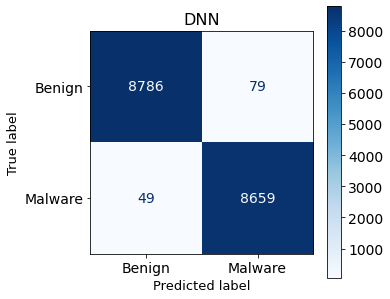

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm8,display_labels=target_names)
fig, ax8, = plt.subplots(figsize=(5,5))
ax8.set_title('DNN', fontdict = {'fontsize': 16})
ax8.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax8.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax8, cmap=plt.cm.Blues)
plt.show()

In [ ]:
print ("accuracy: ",accuracy_score(ytest_array, y_pred11))
print ("f1-score: ",f1_score(ytest_array, y_pred11))
print ("recall: ", recall_score(ytest_array, y_pred11))
print ("precision: ", precision_score(ytest_array, y_pred11))

accuracy:  0.9927160985602913
f1-score:  0.9926630746302878
recall:  0.9943729903536977
precision:  0.9909590295262074


In [ ]:
roc_auc_score(ytest_array, y_pred11)

0.9927307704165556

In [ ]:
xtrain_array = np.asarray(train_data.select('features_all').collect())
xtest_array = np.asarray(test_data.select('features_all').collect())
ytrain_array = np.asarray(train_data.select('Class').collect())
ytest_array = np.asarray(test_data.select('Class').collect())

In [ ]:
print(ytrain_array.shape)
print(ytest_array.shape)
print(xtrain_array.shape)
print(xtest_array.shape)

(41023, 1)
(17573, 1)
(41023, 1, 52)
(17573, 1, 52)


In [ ]:
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)

In [ ]:
model22 = Sequential()

model22.add(layers.LSTM(64, activation = "relu", return_sequences = True))
model22.add(Dropout(0.4))

model22.add(layers.LSTM(64, activation = "relu", return_sequences = False))
model22.add(Dropout(0.4))

model22.add(Dense(1, activation = "sigmoid"))

model22.compile(loss="binary_crossentropy",optimizer = "adam")

model22.fit(xtrain_array, ytrain_array,
          epochs=10, validation_data=(xtest_array, ytest_array),verbose=1)

Epoch 1/10
1282/1282 [==============================] - 11s 6ms/step - loss: 0.3391 - val_loss: 0.0673
Epoch 2/10
1282/1282 [==============================] - 7s 5ms/step - loss: 0.0731 - val_loss: 0.0457
Epoch 3/10
1282/1282 [==============================] - 7s 6ms/step - loss: 0.0541 - val_loss: 0.0356
Epoch 4/10
1282/1282 [==============================] - 7s 5ms/step - loss: 0.0454 - val_loss: 0.0326
Epoch 5/10
1282/1282 [==============================] - 7s 5ms/step - loss: 0.0398 - val_loss: 0.0289
Epoch 6/10
1282/1282 [==============================] - 7s 5ms/step - loss: 0.0363 - val_loss: 0.0240
Epoch 7/10
1282/1282 [==============================] - 8s 6ms/step - loss: 0.0326 - val_loss: 0.0277
Epoch 8/10
1282/1282 [==============================] - 7s 5ms/step - loss: 0.0312 - val_loss: 0.0240
Epoch 9/10
1282/1282 [==============================] - 7s 6ms/step - loss: 0.0296 - val_loss: 0.0210
Epoch 10/10
1282/1282 [==============================] - 7s 6ms/step - loss: 0.02

In [ ]:
model22.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 64)             29952     
                                                                 
 dropout_13 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 63,041
Trainable params: 63,041
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Long Short-Term Memory (LSTM)')

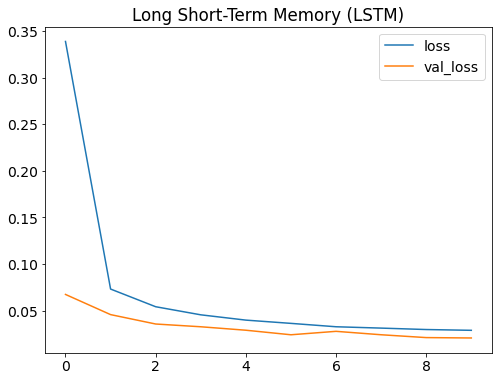

In [ ]:
kayipDf22 = pd.DataFrame(model22.history.history)
ax2 = kayipDf22.plot()
ax2.set_title("Long Short-Term Memory (LSTM)")

In [ ]:
y_pred22 = model22.predict(xtest_array)

In [ ]:
y_pred22= np.where(y_pred22 > 0.5, 1, 0)
y_pred22

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:


from sklearn.metrics import classification_report, confusion_matrix
target_names = ["Benign","Malware"]
print(classification_report(ytest_array,y_pred22,target_names = target_names))

              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99      8865
     Malware       0.99      1.00      0.99      8708

    accuracy                           0.99     17573
   macro avg       0.99      0.99      0.99     17573
weighted avg       0.99      0.99      0.99     17573



In [ ]:
cm9 = confusion_matrix(ytest_array,y_pred22)
cm9

array([[8792,   73],
       [  27, 8681]])

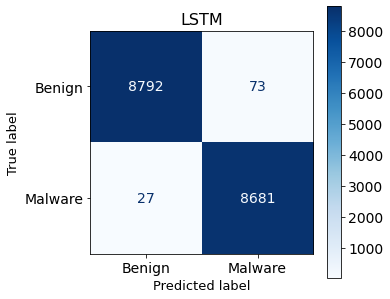

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm9,display_labels=target_names)
fig, ax9, = plt.subplots(figsize=(5,5))
ax9.set_title('LSTM', fontdict = {'fontsize': 16})
ax9.set_xlabel('Predicted Class', fontdict = {'fontsize': 13})
ax9.set_ylabel('True Class', fontdict = {'fontsize': 13})
plt.rcParams.update({'font.size': 14})
cmp.plot(ax=ax9, cmap=plt.cm.Blues)
plt.show()

In [ ]:
print ("accuracy: ",accuracy_score(ytest_array, y_pred22))
print ("f1-score: ",f1_score(ytest_array, y_pred22))
print ("recall: ", recall_score(ytest_array, y_pred22))
print ("precision: ", precision_score(ytest_array, y_pred22))

accuracy:  0.9943094520002276
f1-score:  0.9942732791203757
recall:  0.9968994028479559
precision:  0.9916609549920037


In [ ]:
roc_auc_score(ytest_array, y_pred22)

0.99433238613915

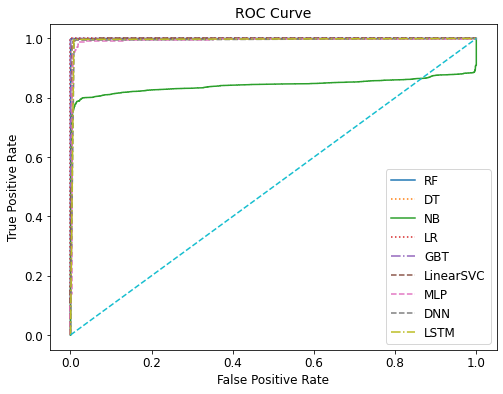

In [ ]:
plt.figure(0).clf()

plt.rcParams.update({'font.size': 12})
plt.xlabel("False Positive Rate", fontdict = {'fontsize': 12})
plt.ylabel("True Positive Rate",fontdict = {'fontsize': 12})
plt.title("ROC Curve",fontdict = {'fontsize': 14})

y_pred1 = predictions.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()
y_true1 = predictions.select("Class").rdd.keys().collect()
fpr1, tpr1, _ = metrics.roc_curve(y_true1, y_pred1)
plt.plot(fpr1,tpr1,label="RF")

y_pred2 = predictions2.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()
y_true2 = predictions2.select("Class").rdd.keys().collect()
fpr2, tpr2,_= metrics.roc_curve(y_true2, y_pred2)
plt.plot(fpr2,tpr2,label="DT", linestyle=':')

y_pred3 = predictions3.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()
y_true3 = predictions3.select("Class").rdd.keys().collect()
fpr3, tpr3, _ = metrics.roc_curve(y_true3, y_pred3)
plt.plot(fpr3,tpr3,label="NB")

y_pred4 = predictions4.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()
y_true4 = predictions4.select("Class").rdd.keys().collect()
fpr4, tpr4, _ = metrics.roc_curve(y_true4, y_pred4)
plt.plot(fpr4,tpr4,label="LR", linestyle='dotted')

y_pred5 = predictions5.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()
y_true5 = predictions5.select("Class").rdd.keys().collect()
fpr5, tpr5, _ = metrics.roc_curve(y_true5, y_pred5)
plt.plot(fpr5,tpr5,label="GBT",linestyle='-.')

y_pred6 = predictions6.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()
y_true6 = predictions6.select("Class").rdd.keys().collect()
fpr6, tpr6, thresholds = metrics.roc_curve(y_true6, y_pred6)
plt.plot(fpr6,tpr6,label="LinearSVC", linestyle='dashed')

y_pred7 = predictions7.select(vector_to_array("rawPrediction")[1]).rdd.keys().collect()
y_true7 = predictions7.select("Class").rdd.keys().collect()
fpr7, tpr7, _ = metrics.roc_curve(y_true7, y_pred7)
plt.plot(fpr7,tpr7,label="MLP", linestyle='--')


fpr11, tpr11, _ = metrics.roc_curve(ytest_array, y_pred11)
plt.plot(fpr11,tpr11,label="DNN", linestyle='--')

fpr22, tpr22, _ = metrics.roc_curve(ytest_array, y_pred22)
plt.plot(fpr22,tpr22,label="LSTM", linestyle='dashdot')

plt.plot([0, 1], [0, 1], linestyle = '--')


plt.legend()

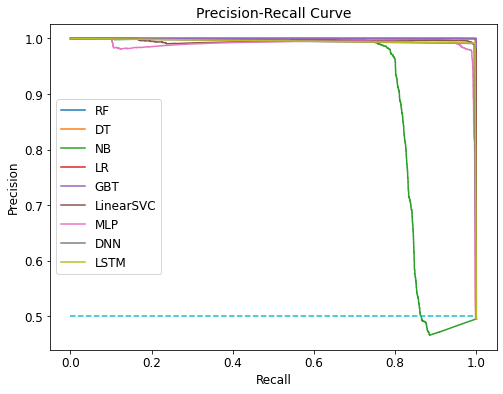

In [ ]:
from sklearn.metrics import precision_recall_curve
plt.rcParams.update({'font.size': 12})
plt.xlabel("Recall", fontdict = {'fontsize': 12})
plt.ylabel("Precision",fontdict = {'fontsize': 12})
plt.title("Precision-Recall Curve",fontdict = {'fontsize': 14})

precision1, recall1, thresholds1 = precision_recall_curve(y_true1, y_pred1)
plt.plot(recall1, precision1,label ="RF")

precision2, recall2, thresholds2 = precision_recall_curve(y_true2, y_pred2)
plt.plot(recall2, precision2,label ="DT")

precision3, recall3, thresholds3 = precision_recall_curve(y_true3, y_pred3)
plt.plot(recall3, precision3,label ="NB")

precision4, recall4, thresholds4 = precision_recall_curve(y_true4, y_pred4)
plt.plot(recall4, precision4,label ="LR")

precision5, recall5, thresholds5 = precision_recall_curve(y_true5, y_pred5)
plt.plot(recall5, precision5,label ="GBT")

precision6, recall6, thresholds6 = precision_recall_curve(y_true6, y_pred6)
plt.plot(recall6, precision6,label ="LinearSVC")

precision7, recall7, thresholds7 = precision_recall_curve(y_true7, y_pred7)
plt.plot(recall7, precision7,label ="MLP")

precision11, recall11, thresholds11 = precision_recall_curve(ytest_array, y_pred11)
plt.plot(recall11, precision11,label ="DNN")

precision22, recall22, thresholds22 = precision_recall_curve(ytest_array, y_pred22)
plt.plot(recall22, precision22,label ="LSTM")

plt.plot([0, 1], [0.5, 0.5], linestyle = '--')

plt.legend();